## Data Collection

Source for the original csv

In [1]:
import csv
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import locale
import seaborn as sns
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [61]:
#Import the original data
movies_df = pd.read_csv('movie_profit.csv')
movies_df.head(3)


,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,174131329.0,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,264246220.0,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,139950708.0,Warner Bros.,PG-13,Adventure


In [62]:
#Create the list of movies to check
movie_list =  movies_df['movie']
len(movie_list)


3401

In [9]:
#Create empty lists for the data to store
from config import api_keys

resultados=[]

url_list=[]

#Create the list of apykeys to ise

key_index = 0
request_count = 0


#The loop to make the requests from the apikey
for movie in movie_list:
 #take the api key from the list according to the key_index value
    my_api_key= api_keys[key_index]
    movie_url = f'http://www.omdbapi.com/?apikey={my_api_key}&t={movie}'
    
    url_list.append(movie_url)

    #make the request & store the information in the dictionary
    response = requests.get(movie_url).json()

    try:
        pelicula = {
            'Title':movie,
            'Director': response['Director'],
            'Writer':response['Writer'],
            'Actors':response['Actors'],
            'Runtime':response['Runtime'],
            'Language':response['Language'],
            'Country':response['Country'],
            'Awards': response['Awards'],
            'Poster': response['Poster'],
            'Metascore': response['Metascore'],
            'imdbRating':response['imdbRating'],
            'imdbVotes':response['imdbVotes'],
            'BoxOffice':response['BoxOffice']
        }
        resultados.append(pelicula)
    except:
        pelicula = {
            'Title':movie,
            'Director': 'Movie not found',
            'Writer':'Movie not found',
            'Actors':'Movie not found',
            'Runtime':'Movie not found',
            'Language':'Movie not found',
            'Country':'Movie not found',
            'Awards': 'Movie not found',
            'Poster': 'Movie not found',
            'Metascore': 'Movie not found',
            'imdbRating':'Movie not found',
            'imdbVotes':'Movie not found',
            'BoxOffice':'Movie not found'
            }
        resultados.append(pelicula)
    
 #add 1 to the request count   
 
    request_count += 1
    
    #when it hits the iteration 990 change to the next apykey and reset the count
    if request_count >= 990:
            key_index += 1
            request_count = 0






{'Title': 'Evan Almighty', 'Director': 'Tom Shadyac', 'Writer': 'Steve Oedekerk, Joel Cohen, Alec Sokolow', 'Actors': 'Steve Carell, Morgan Freeman, Lauren Graham', 'Runtime': '96 min', 'Language': 'English', 'Country': 'United States', 'Awards': '2 wins & 11 nominations', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTUxMTEzODYxMV5BMl5BanBnXkFtZTcwNzQ4ODU0MQ@@._V1_SX300.jpg', 'Metascore': '37', 'imdbRating': '5.4', 'imdbVotes': '152,796', 'BoxOffice': '$100,462,298'}
{'Title': 'Waterworld', 'Director': 'Kevin Reynolds', 'Writer': 'Peter Rader, David Twohy', 'Actors': 'Kevin Costner, Jeanne Tripplehorn, Dennis Hopper', 'Runtime': '177 min', 'Language': 'English', 'Country': 'United States', 'Awards': 'Nominated for 1 Oscar. 6 wins & 9 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BYzE4NTRmMDYtNWYzYi00YmNkLTk4NDEtYjFmMDc4ODQ3ODY2XkEyXkFqcGdeQXVyNTUyMzE4Mzg@._V1_SX300.jpg', 'Metascore': '56', 'imdbRating': '6.3', 'imdbVotes': '205,371', 'BoxOffice': '$88,246

In [12]:
results = pd.DataFrame(resultados)

In [1]:
movies_df_complete = movies_df.rename(columns={'movie':'Title'})

NameError: name 'movies_df' is not defined

In [16]:
movies_df_complete = movies_df_complete.merge(results , on='Title')

In [22]:
movies_df_complete.to_csv('Movies_Complete.csv')

## Data Cleaning

In [2]:
movies_df_complete = pd.read_csv('Movies_Complete.csv')
movies_df_complete.head(2)


,Unnamed: 0.1,Unnamed: 0,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,...,Actors,Runtime,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice
0,0,1,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,...,"Steve Carell, Morgan Freeman, Lauren Graham",96 min,English,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298"
1,1,2,7/28/1995,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,...,"Kevin Costner, Jeanne Tripplehorn, Dennis Hopper",177 min,English,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220"


In [3]:
movies_df_complete['Title'].value_counts()
movies_df_complete = movies_df_complete.drop_duplicates(subset='Title',keep='first')
movies_df_complete = movies_df_complete.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
movies_df_complete['Title'].value_counts()
movies_df_complete.head(2)

,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,Director,Writer,Actors,Runtime,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice
0,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,Tom Shadyac,"Steve Oedekerk, Joel Cohen, Alec Sokolow","Steve Carell, Morgan Freeman, Lauren Graham",96 min,English,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298"
1,7/28/1995,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,Kevin Reynolds,"Peter Rader, David Twohy","Kevin Costner, Jeanne Tripplehorn, Dennis Hopper",177 min,English,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220"


In [4]:
movies_df_complete['Revenue'] = movies_df_complete['worldwide_gross']-movies_df_complete['production_budget']

movies_df_complete['%_Revenue'] = (movies_df_complete['Revenue']/movies_df_complete['production_budget'])*100

movies_df_complete['release_date'] = pd.to_datetime(movies_df_complete['release_date'])

movies_df_complete['Year'] = movies_df_complete['release_date'].dt.year

movies_df_complete.head(2)

,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,Director,Writer,...,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Year
0,2007-06-22,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,Tom Shadyac,"Steve Oedekerk, Joel Cohen, Alec Sokolow",...,United States,2 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,"152,796","$100,462,298",-868671,-0.496383,2007
1,1995-07-28,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action,Kevin Reynolds,"Peter Rader, David Twohy",...,United States,Nominated for 1 Oscar. 6 wins & 9 nominations ...,https://m.media-amazon.com/images/M/MV5BYzE4NT...,56,6.3,"205,371","$88,246,220",89246220,50.997840,1995


## By Year Analysis

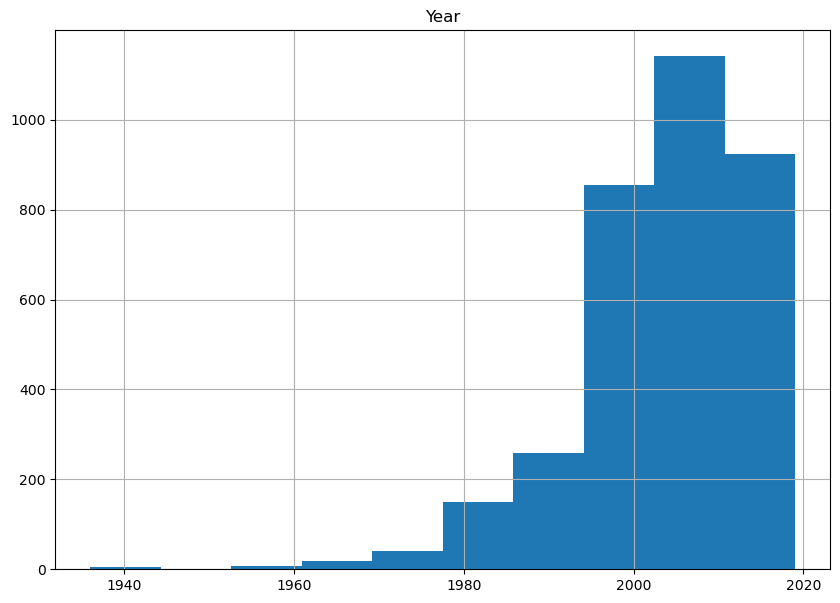

In [5]:
# Histogram of the all the movies in the data frame by year

movies_df_complete.hist(column='Year',figsize=(10,7))
plt.savefig('./figures/hist_all_movies_by_year.png')
plt.show()

In [6]:
# Check number of movies and the time frame of the data frame
movies_df_complete['Year'].sort_values()

3216    1936
2981    1939
3115    1940
3318    1942
3254    1943
        ... 
2476    2018
401     2018
1129    2018
2397    2018
228     2019
Name: Year, Length: 3400, dtype: int64

In [7]:
#Define the time frame for the analysis
lowery=2000
uppery=2019

#Filter the Data Frame with the selected years
years_movies_df = movies_df_complete[movies_df_complete['Year'].between(lowery,uppery)]


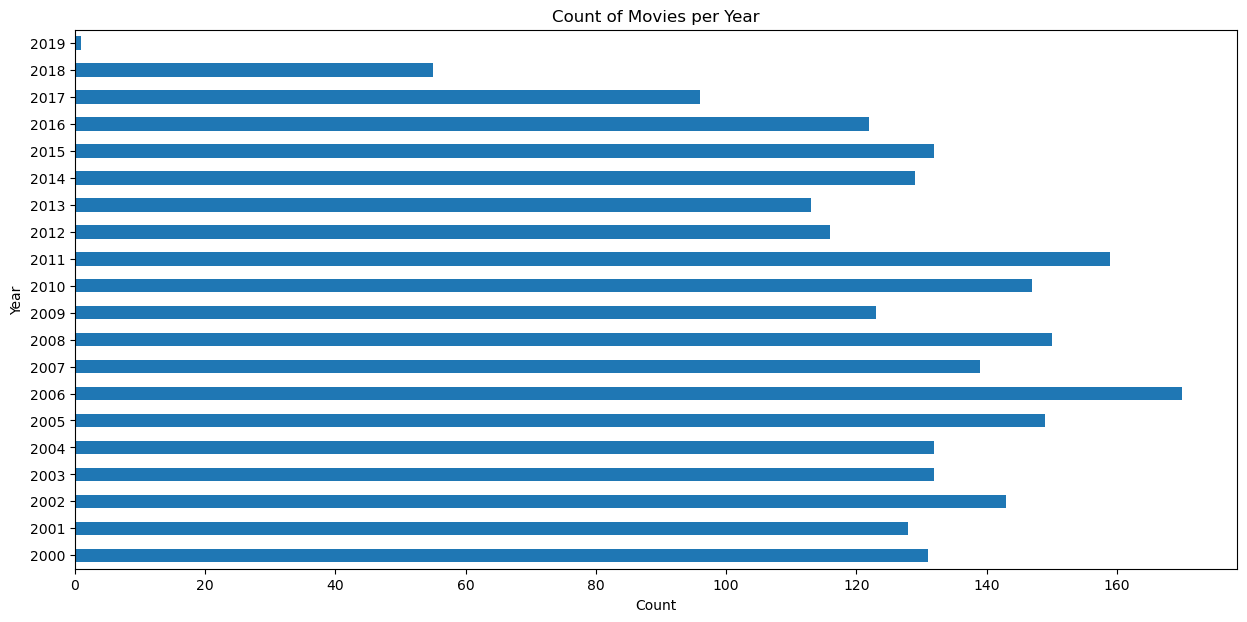

In [8]:
# Generate plot with the count of movies per year for the selected time frame

year_count_filtered = years_movies_df[['Year']].value_counts().reset_index().sort_values(by='Year')

year_count_filtered.plot(kind='barh', x='Year', figsize=(15,7), legend=False)
plt.xlabel('Count')
plt.title("Count of Movies per Year")
plt.savefig(f'./figures/count_movies_per_year_from_{lowery}_to_{uppery}.png')

plt.show()

## Exploratory Analysis for the selected time frame

In [9]:
#extracting quarter
years_movies_df['quarter'] = years_movies_df['release_date'].dt.quarter
print(years_movies_df['quarter'])

0       2
2       2
3       4
4       2
5       3
       ..
3393    2
3394    2
3395    4
3396    3
3399    3
Name: quarter, Length: 2467, dtype: int64


C:\Users\dmontiel\AppData\Local\Temp\ipykernel_18372\804073155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_movies_df['quarter'] = years_movies_df['release_date'].dt.quarter


In [10]:
#Calculating the quarter revenue by year
quarter_revenue = pd.DataFrame(years_movies_df.groupby(['Year', 'quarter'])['Revenue'].mean())
quarter_revenue

Revenue
Year quarter              
2000 1        2.353347e+07
     2        5.683170e+07
     3        4.291774e+07
     4        4.581810e+07
2001 1        2.918721e+07
...                    ...
2018 1        1.024210e+08
     2        1.670935e+08
     3        1.078697e+08
     4        6.055338e+07
2019 1       -1.000000e+08

[77 rows x 1 columns]

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year')


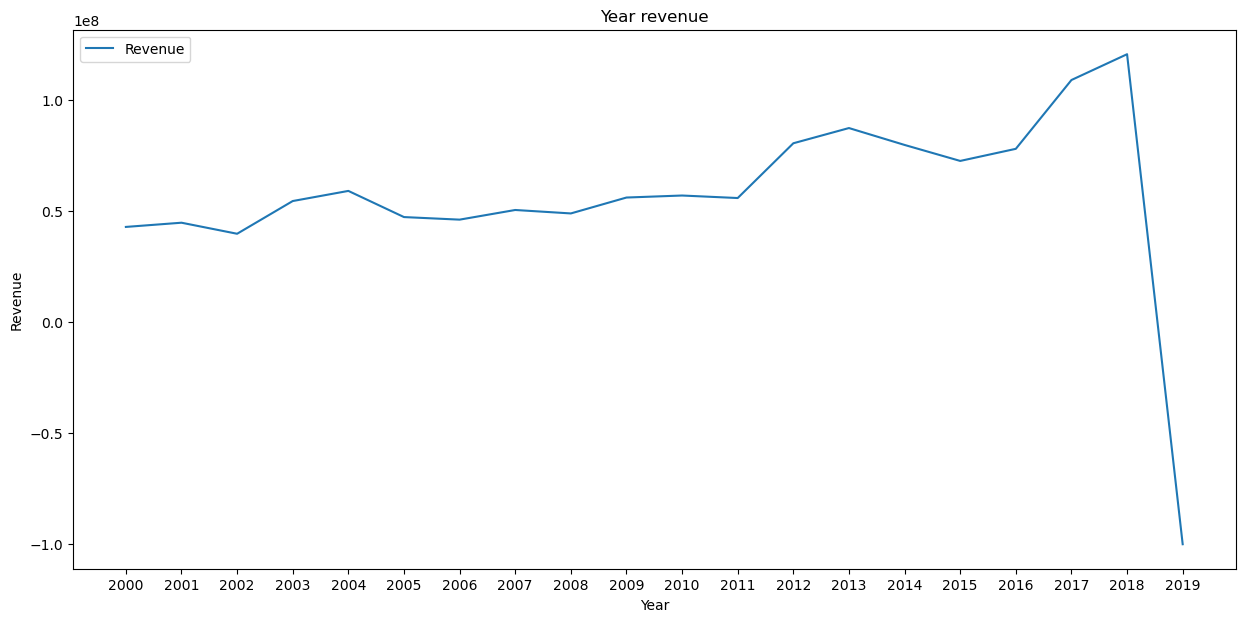

In [11]:
#Revenue of movies per year
year_revenue = years_movies_df.groupby(['Year'])['Revenue'].mean()
year_revenue = pd.DataFrame(years_movies_df.groupby(['Year'])['Revenue'].mean())
year=year_revenue.index
print(year)

year_revenue.plot(kind='line', figsize=(15,7)).set_xticks(year)

plt.title('Year revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.savefig(f'./figures/revenue_by_year_from_{lowery}_to_{uppery}.png')

plt.show()

In [12]:
#Determine the revenue of each distributor over the years
revenue_distributor_per_year = pd.DataFrame(years_movies_df.groupby(['distributor', 'Year'])['Revenue'].sum())
revenue_distributor_per_year

Revenue
distributor          Year            
20th Century Fox     2000   842424835
                     2001   292116692
                     2002   765970108
                     2003   565714264
                     2004  1023380586
...                               ...
XLrator Media        2014    -4072926
Yari Film Group Rel… 2006    67292062
                     2007    -9739445
Yash Raj Films       2018    -1401194
Zeitgeist            2003     -326515

[590 rows x 1 columns]

In [13]:
#Top 10 distributors over time
gral_revenue_distributor = pd.DataFrame(years_movies_df.groupby(['distributor'])['Revenue'].sum())
gral_revenue_distributor = gral_revenue_distributor.sort_values(by='Revenue', ascending=False)
gral_revenue_distributor

,Revenue
distributor,
20th Century Fox,25710068126
Universal,23341222260
Warner Bros.,22630862445
Sony Pictures,17597827520
Paramount Pictures,16645716358
...,...
Saban Films,-56496758
ThinkFilm,-60401333
Clarius Entertainment,-67777266


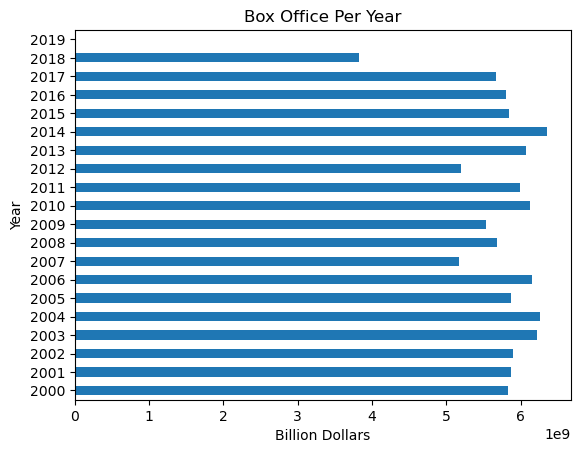

In [14]:
#Cumulative BoxOffice of all movies in the time frame
boxoffice_per_year = years_movies_df.groupby('Year')['domestic_gross'].sum()
boxoffice_per_year = pd.DataFrame(boxoffice_per_year)

boxoffice_per_year.plot(kind='barh', legend=False)


plt.title('Box Office Per Year')
plt.ylabel('Year')
plt.xlabel('Billion Dollars')
plt.savefig(f'./figures/BoxxOffice_per_year_{lowery}_to_{uppery}.png')

plt.show()

## Analysis of genres

### EDA for Genre

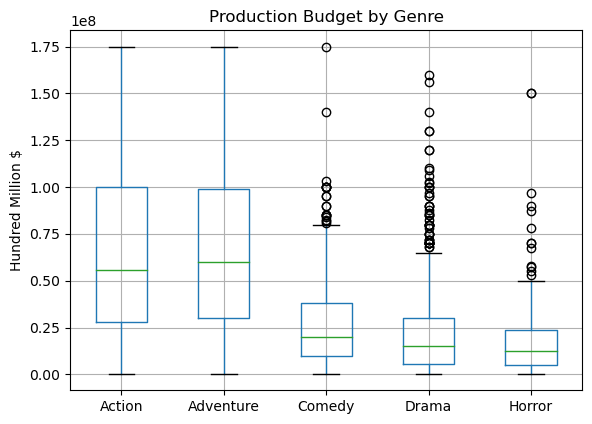

In [15]:
#Production Budget by genre 
years_movies_df.boxplot(column='production_budget', by='genre')
plt.title('Production Budget by Genre')
plt.suptitle('')

plt.ylabel('Hundred Million $')
plt.xlabel('')

plt.savefig(f'./figures/boxplot_production_budget_by_genre_{lowery}_to_{uppery}.png')
plt.show()

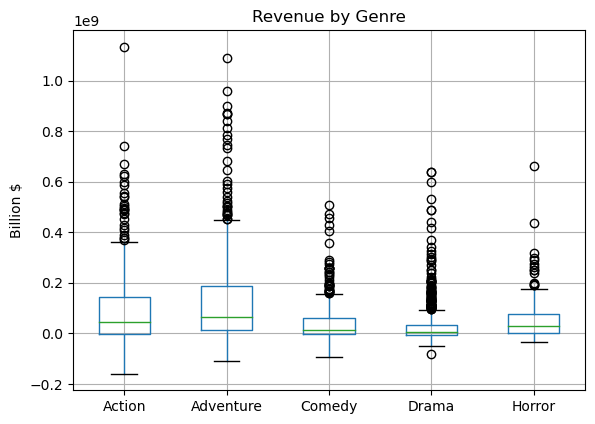

In [16]:
#Revenue by Genre
years_movies_df.boxplot(column='Revenue', by='genre')
plt.title('Revenue by Genre')
plt.suptitle('')

plt.ylabel('Billion $')
plt.xlabel('')
plt.savefig(f'./figures/revenue_by_genre_{lowery}_to_{uppery}.png')
plt.show()

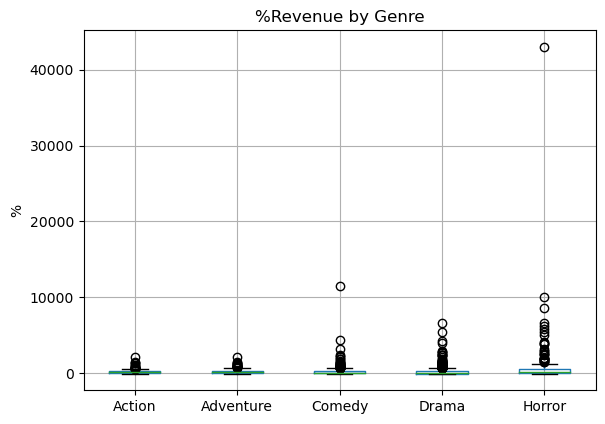

In [17]:
#% Revenue by Genre
years_movies_df.boxplot(column='%_Revenue', by='genre')
plt.title('%Revenue by Genre')
plt.suptitle('')

plt.ylabel('%')
plt.xlabel('')
plt.savefig(f'./figures/percentage_revenue_by_genre_{lowery}_to_{uppery}.png')

plt.show()

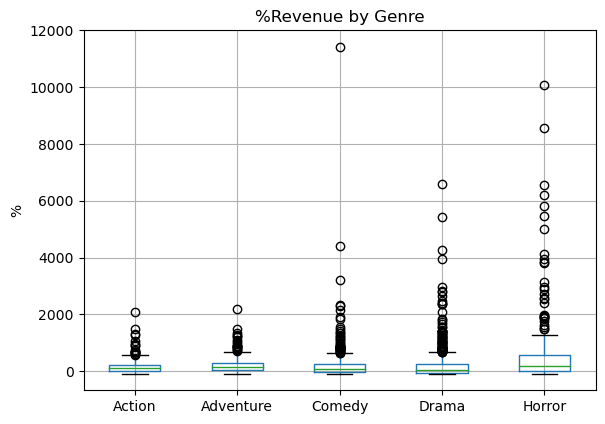

In [18]:
#% Revenue by Genre without Horror outlier
years_movies_df[years_movies_df['%_Revenue']<=15000].boxplot(column='%_Revenue', by='genre')

plt.title('%Revenue by Genre')
plt.suptitle('')
plt.ylabel('%')
plt.xlabel('')
plt.savefig(f'./figures/percentege_revenue_by_genre_no_outlier_{lowery}_to_{uppery}.png')

plt.show()

In [19]:
#Descriptive statistics for the key variables
budget_stat= years_movies_df.groupby('genre')['production_budget'].describe()
revenue_stat = years_movies_df.groupby('genre')['Revenue'].describe()
genre_percent_rev_desc = years_movies_df.groupby('genre')['%_Revenue'].describe()

#Adding and substracting one std to the mean of percentage revenue
genre_percent_rev_desc['+1_std']= genre_percent_rev_desc['mean'] + genre_percent_rev_desc['std']
genre_percent_rev_desc['-1_std']= genre_percent_rev_desc['mean'] - genre_percent_rev_desc['std']

print('Production Budget statistics')
print(budget_stat)

print('\n')
print('Revenue statistics')
print(revenue_stat)

print('\n')
print('% Revenue statistics')
print(genre_percent_rev_desc)


Production Budget statistics
           count          mean           std       min         25%  \
genre                                                                
Action     359.0  6.573116e+07  4.676732e+07  250000.0  28000000.0   
Adventure  364.0  6.847775e+07  4.522087e+07  400000.0  30000000.0   
Comedy     601.0  2.627289e+07  2.327749e+07  300000.0  10000000.0   
Drama      933.0  2.167022e+07  2.293860e+07  250000.0   5500000.0   
Horror     210.0  1.854845e+07  2.190522e+07  400000.0   5000000.0   

                  50%          75%          max  
genre                                            
Action     56000000.0  100000000.0  175000000.0  
Adventure  60000000.0   99250000.0  175000000.0  
Comedy     20000000.0   38000000.0  175000000.0  
Drama      15000000.0   30000000.0  160000000.0  
Horror     12250000.0   23750000.0  150000000.0  


Revenue statistics
           count          mean           std          min          25%  \
genre                              

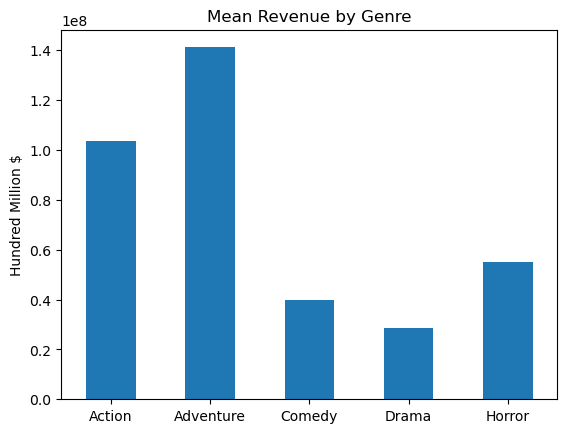

In [20]:
#Mean revenue by genre
revenue_stat.plot(kind='bar', y='mean',legend=False)

plt.title('Mean Revenue by Genre')
plt.ylabel('Hundred Million $')
plt.xlabel('')
plt.xticks(rotation=0)

plt.savefig(f'./figures/mean_revenue_by_genre_{lowery}_to_{uppery}.png')

plt.show()

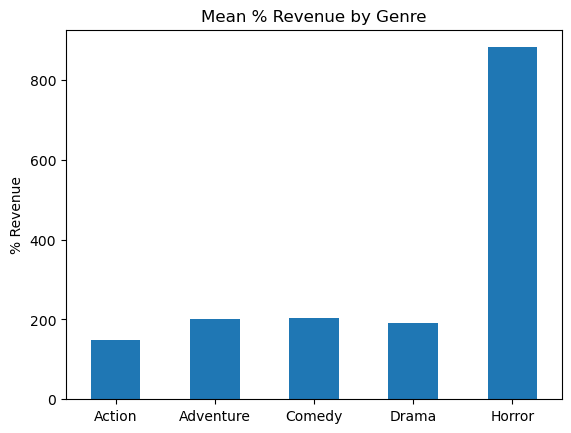

In [21]:
genre_percent_rev_desc.plot(kind='bar', y='mean',legend=False)
plt.title('Mean % Revenue by Genre')
plt.ylabel('% Revenue')
plt.xlabel('')
plt.xticks(rotation=0)
plt.savefig(f'./figures/percentage_mean_revenue_by_genre_{lowery}_to_{uppery}.png')

plt.show()

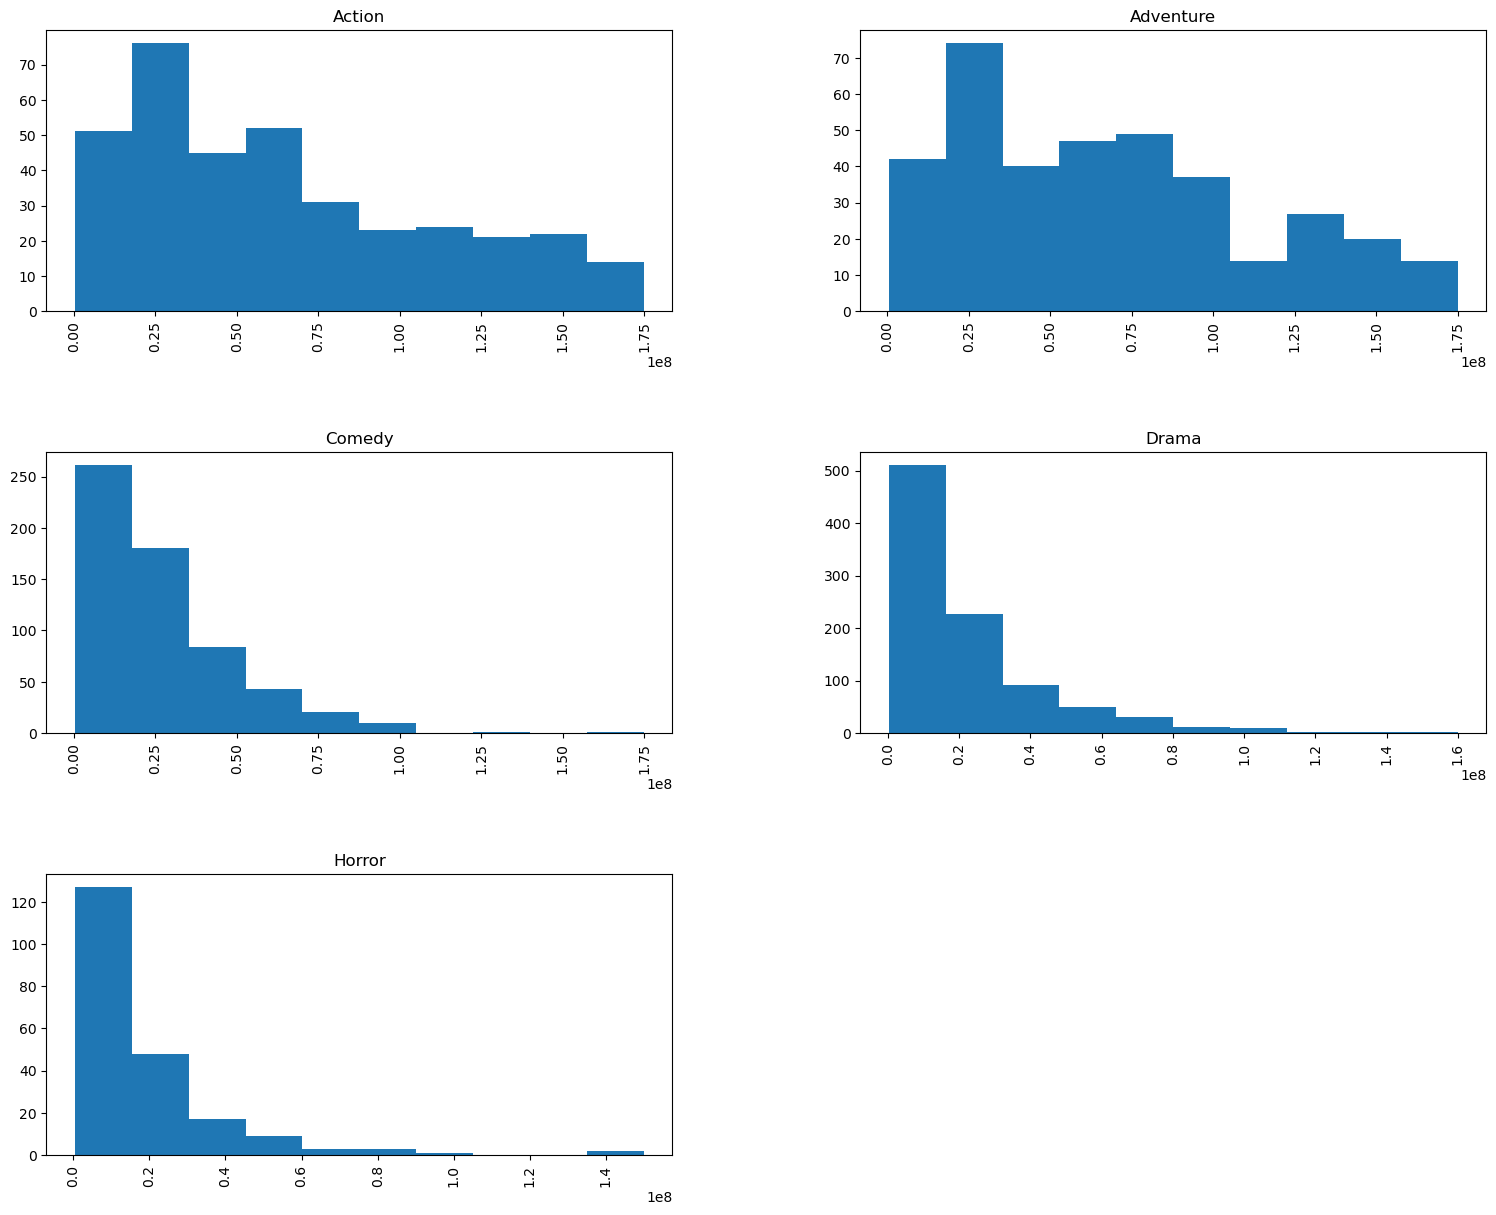

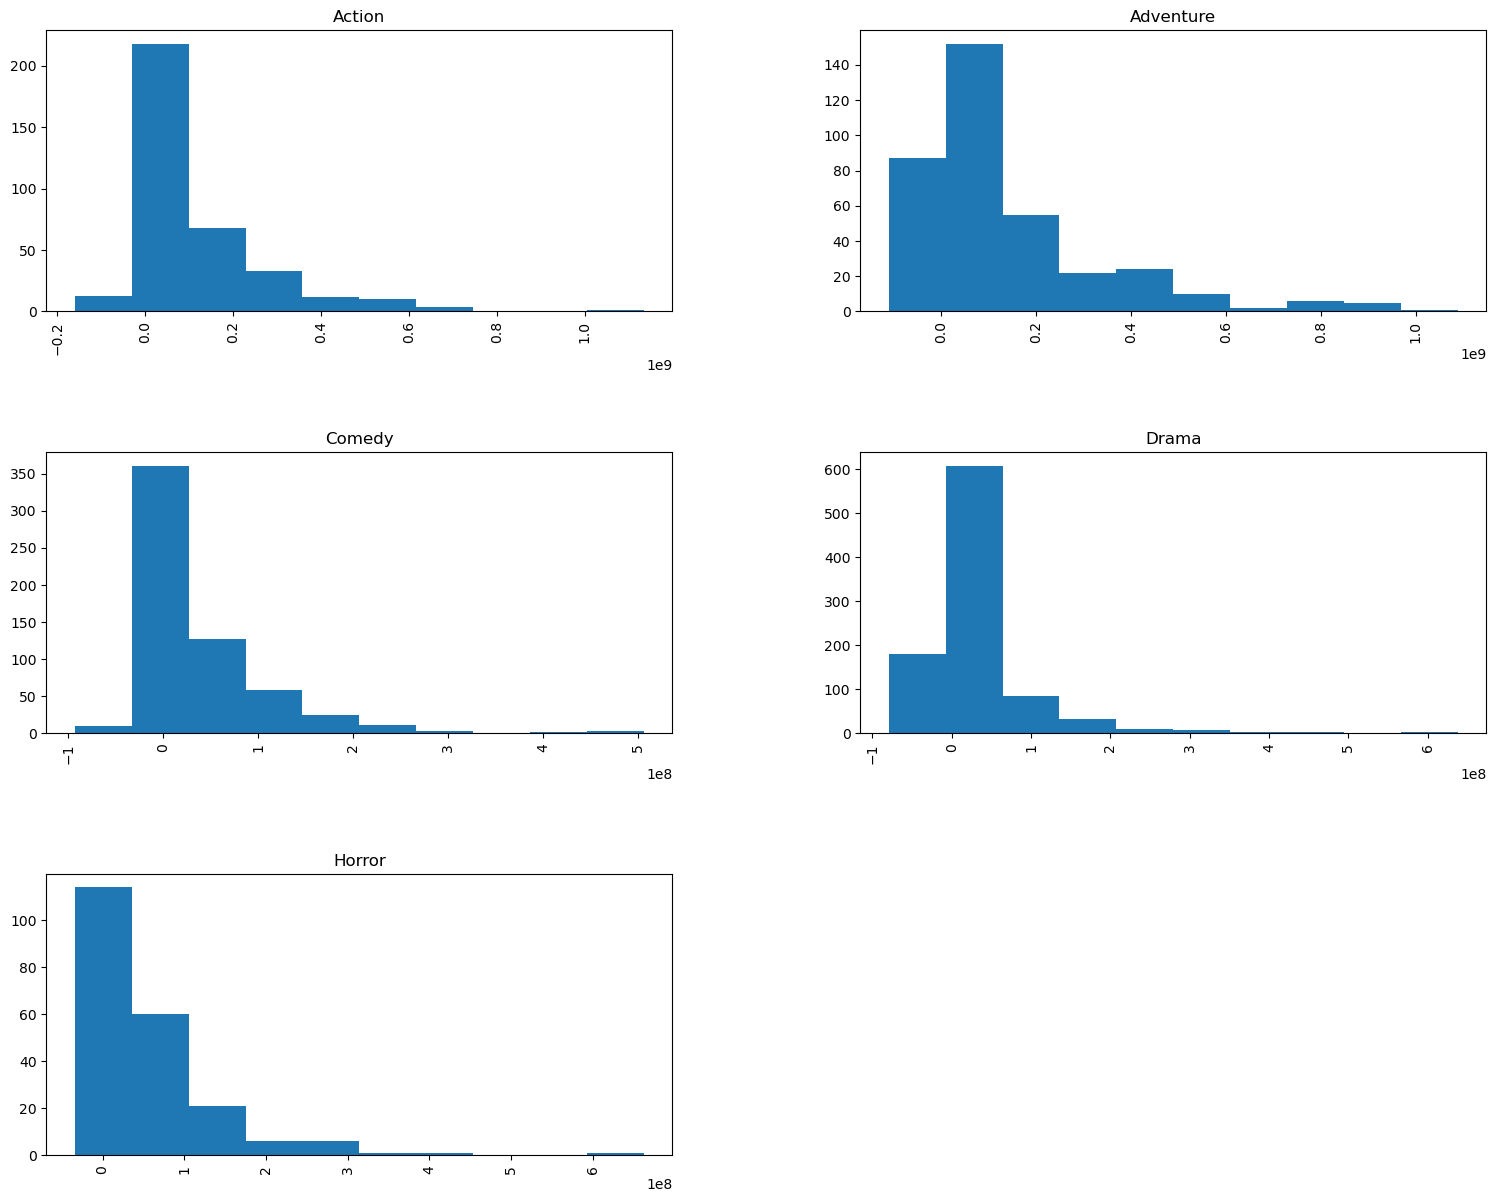

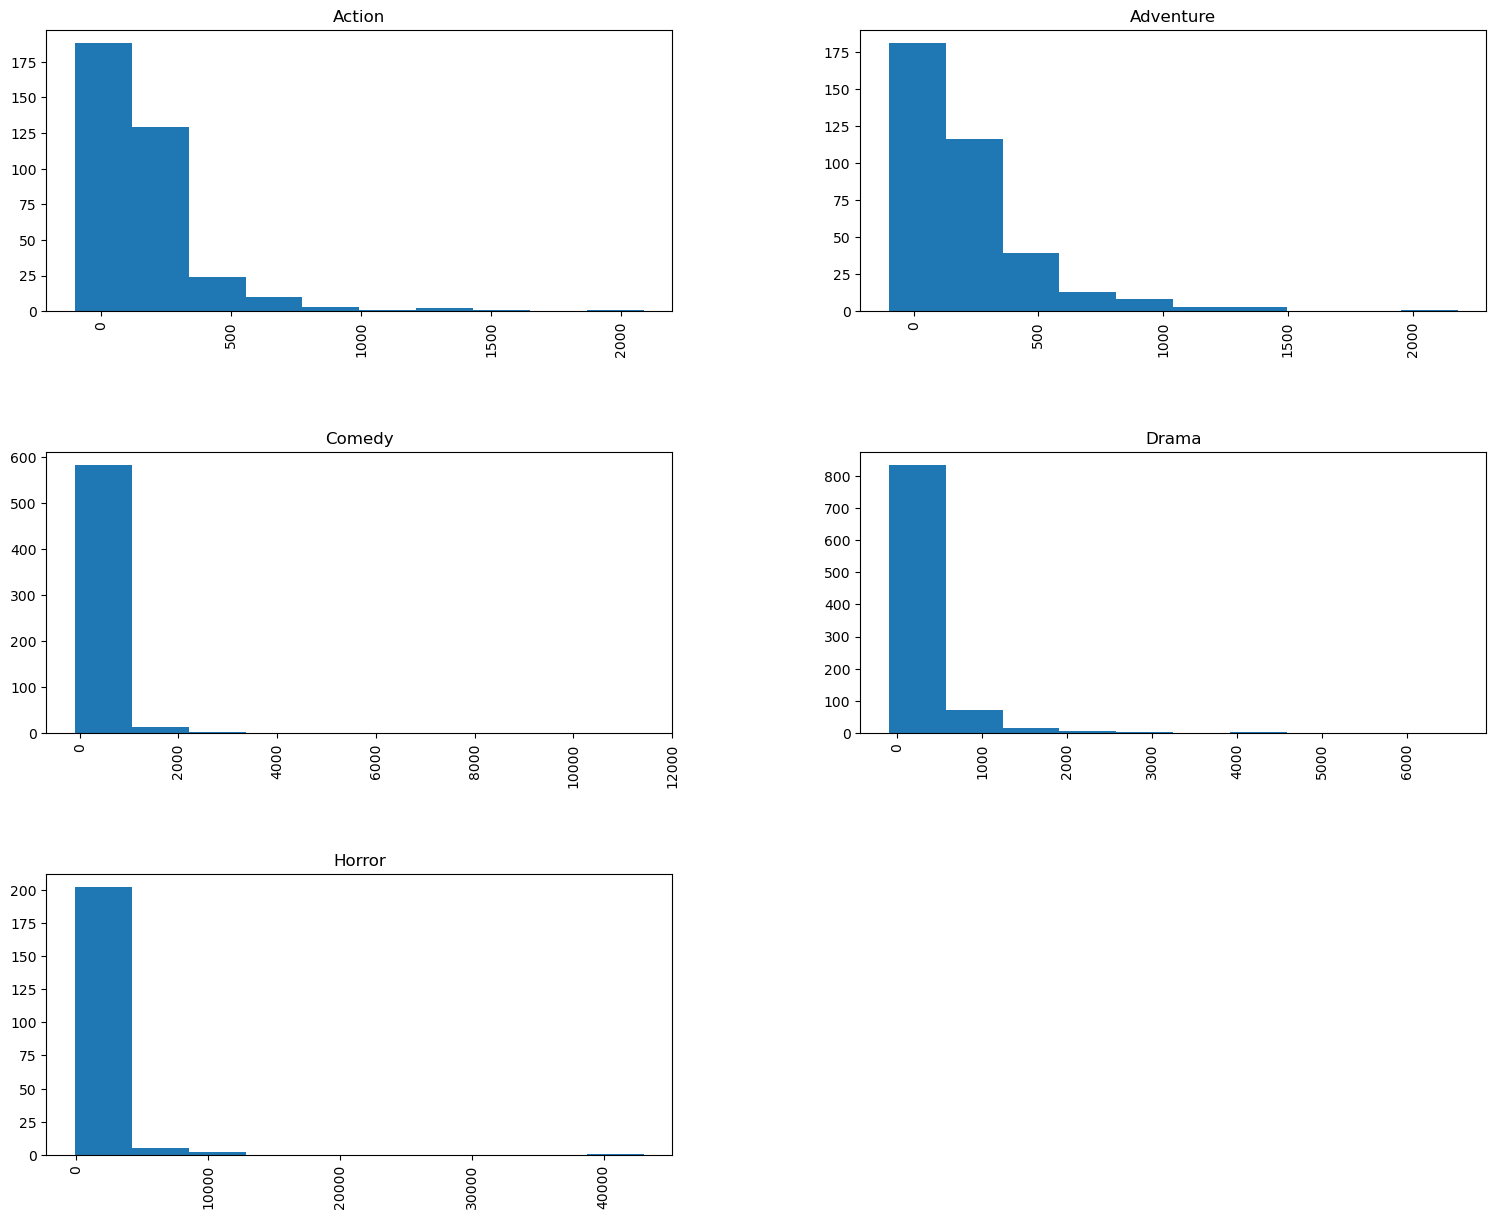

In [22]:
# Histograms of the key variables to check the type of distribution
years_movies_df.hist(column='production_budget', by='genre',figsize=(18,15))
plt.show()
years_movies_df.hist(column='Revenue', by='genre',figsize=(18,15))
plt.show()
years_movies_df.hist(column='%_Revenue', by='genre',figsize=(18,15))
plt.show()

In [23]:
#Outlier for the % Revenue
years_movies_df[years_movies_df['%_Revenue']==years_movies_df['%_Revenue'].max()]

,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,Director,Writer,...,Awards,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Year,quarter
3363,2009-09-25,Paranormal Activity,450000,107918810,194183034,Paramount Pictures,R,Horror,Oren Peli,Oren Peli,...,3 wins & 12 nominations,https://m.media-amazon.com/images/M/MV5BMjY1Nj...,68,6.3,"250,523","$107,918,810",193733034,43051.785333,2009,3


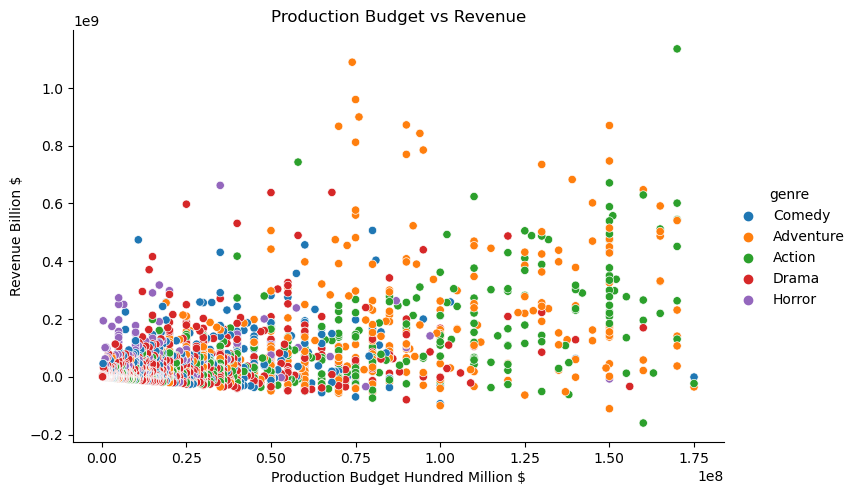

In [25]:
#Check for correlation between Production Budget and Revenue
sns.relplot(data=years_movies_df, x='production_budget', y='Revenue', hue='genre',  aspect=1.5)
plt.title('Production Budget vs Revenue')
plt.xlabel('Production Budget Hundred Million $')
plt.ylabel('Revenue Billion $')
plt.savefig(f'./figures/prod_budget_vs_revenue_{lowery}_to_{uppery}.png')
plt.show()

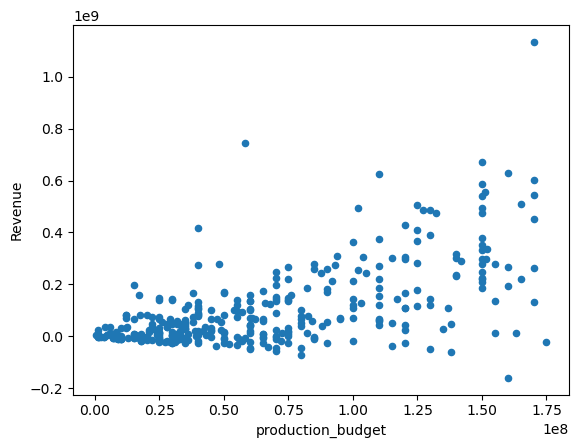

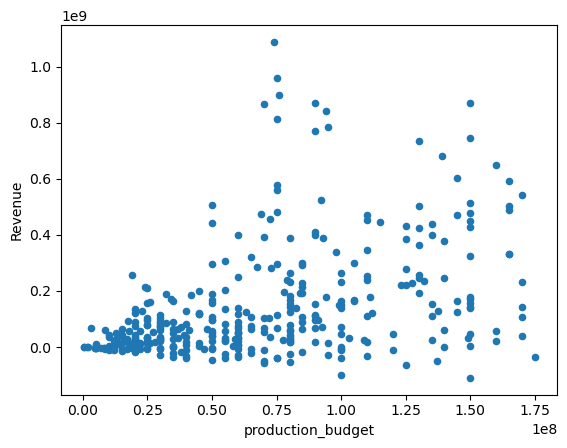

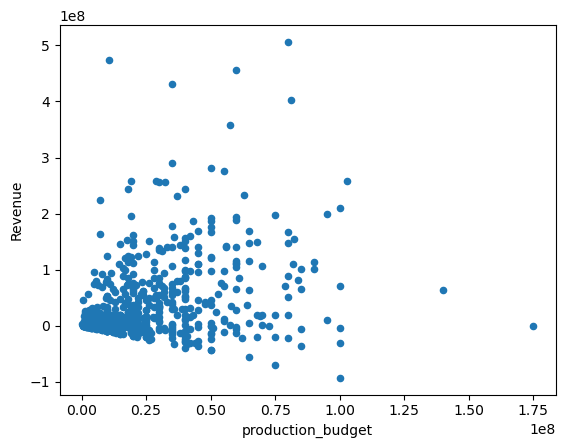

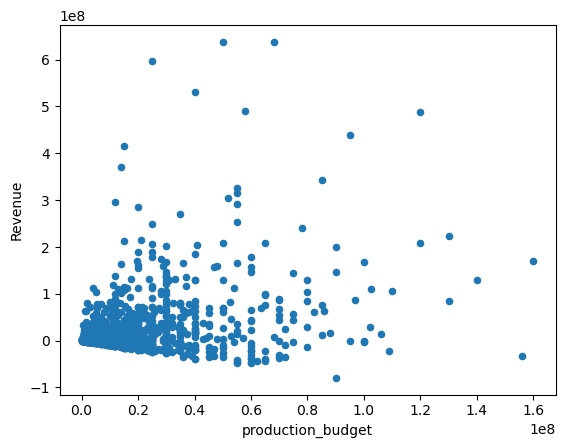

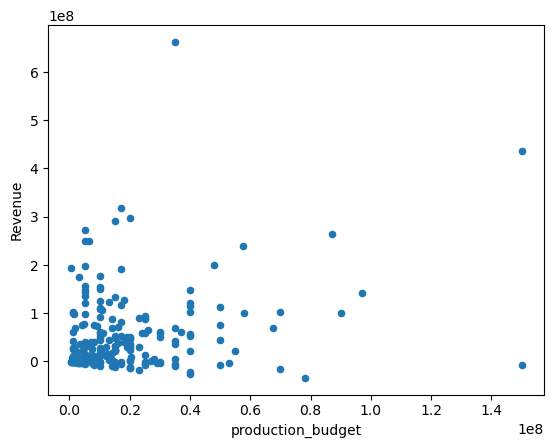

In [27]:
#Check for correlation in each genre
years_movies_df.groupby('genre').plot.scatter(x='production_budget',y='Revenue')
plt.show()

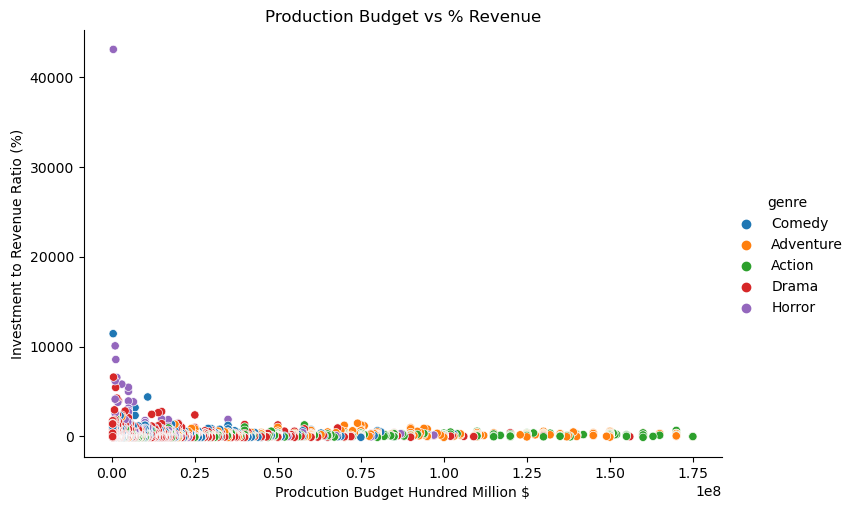

In [26]:
#Check for correlation between Production Budget and % Revenue
sns.relplot(data=years_movies_df, x='production_budget', y='%_Revenue', hue='genre', aspect=1.5)
plt.title('Production Budget vs % Revenue')
plt.xlabel('Prodcution Budget Hundred Million $')
plt.ylabel('Investment to Revenue Ratio (%)')
plt.savefig(f'./figures/prod_budget_vs_percentage_revenue_{lowery}_to_{uppery}.png')
plt.show()

## By Actor Analysis

In [29]:

#Replace the string structure to clean numbers and Add the list of actors in each movie
years_movies_df['Actors'] = years_movies_df['Actors'].str.replace(', ',',')
years_movies_df['Actors'] = years_movies_df['Actors'].str.replace(' ,',',')
years_movies_df['Actors List'] = years_movies_df['Actors'].str.split(',')
years_movies_df['imdbVotes'] = years_movies_df['imdbVotes'].str.replace(',','')
years_movies_df['BoxOffice'] = years_movies_df['BoxOffice'].str.replace(',','')
years_movies_df['BoxOffice'] = years_movies_df['BoxOffice'].str.replace('$','')

#Delete the movies that don't have actors data
movies_df_clean = years_movies_df.loc[years_movies_df['Actors']!='Movie not found']
movies_df_clean = movies_df_clean.loc[movies_df_clean['Actors'].notnull()]
movies_df_clean.columns
movies_df_clean.head(1)


C:\Users\dmontiel\AppData\Local\Temp\ipykernel_18372\644565608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_movies_df['Actors'] = years_movies_df['Actors'].str.replace(', ',',')
C:\Users\dmontiel\AppData\Local\Temp\ipykernel_18372\644565608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_movies_df['Actors'] = years_movies_df['Actors'].str.replace(' ,',',')
C:\Users\dmontiel\AppData\Local\Temp\ipykernel_18372\644565608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

,release_date,Title,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,Director,Writer,...,Poster,Metascore,imdbRating,imdbVotes,BoxOffice,Revenue,%_Revenue,Year,quarter,Actors List
0,2007-06-22,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy,Tom Shadyac,"Steve Oedekerk, Joel Cohen, Alec Sokolow",...,https://m.media-amazon.com/images/M/MV5BMTUxMT...,37,5.4,152796,100462298,-868671,-0.496383,2007,2,"[Steve Carell, Morgan Freeman, Lauren Graham]"


In [30]:
#Change the values of columns to numeric

movies_df_clean['Metascore']=pd.to_numeric(movies_df_clean['Metascore'])
movies_df_clean['imdbRating']=pd.to_numeric(movies_df_clean['imdbRating'])
movies_df_clean['imdbVotes']=pd.to_numeric(movies_df_clean['imdbVotes'])
movies_df_clean['BoxOffice']=pd.to_numeric(movies_df_clean['BoxOffice'])


In [31]:
#Create a exploded list to analyze each actor
movies_explode_actors=movies_df_clean.explode("Actors List")
movies_explode_actors_grouped=movies_explode_actors.groupby(['Actors List'])

In [32]:
#Create a list of all actors
actors = movies_explode_actors['Actors List'].unique()
actors_metrics =pd.DataFrame()
actors_metrics['Actor']=actors


#Create metrics the metrics of the actors 
av_rev=[]
per_av_rev=[]
movie_count=[]
av_budget=[]
av_metascore=[]
av_imdbscore=[]
genres=[]
av_boxoffice=[]

for actor in actors:
    av_rev.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['Revenue'].mean())
    per_av_rev.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['%_Revenue'].mean())
    movie_count.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['Title'].count())
    av_budget.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['production_budget'].mean())
    av_metascore.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['Metascore'].mean())
    av_imdbscore.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['imdbRating'].mean())
    genres.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['genre'].unique())
    av_boxoffice.append(movies_explode_actors.loc[movies_explode_actors['Actors List']==actor]['BoxOffice'].mean())

actors_metrics['Average budget']=av_budget
actors_metrics['Average revenue']=av_budget
actors_metrics['Percentage average revenue']=per_av_rev
actors_metrics['Average boxOffice']=av_boxoffice
actors_metrics['Movie count']=movie_count
actors_metrics['Average metascore']=av_metascore
actors_metrics['Average imdbScore']=av_imdbscore
actors_metrics['Genres']=genres

actors_metrics

,Actor,Average budget,Average revenue,Percentage average revenue,Average boxOffice,Movie count,Average metascore,Average imdbScore,Genres
0,Steve Carell,5.558824e+07,5.558824e+07,396.971195,1.163250e+08,17,62.411765,6.788235,"[Comedy, Adventure, Drama]"
1,Morgan Freeman,5.466667e+07,5.466667e+07,223.547216,7.561692e+07,18,51.777778,6.488889,"[Comedy, Action, Drama]"
2,Lauren Graham,9.750000e+07,9.750000e+07,-38.987914,5.245234e+07,2,47.000000,6.200000,"[Comedy, Drama]"
3,Charlie Hunnam,9.250000e+07,9.250000e+07,-52.200083,2.038112e+07,2,56.000000,6.900000,"[Adventure, Drama]"
4,Astrid Bergès-Frisbey,8.800000e+07,8.800000e+07,-17.394133,1.975577e+07,2,49.000000,7.000000,"[Adventure, Drama]"
...,...,...,...,...,...,...,...,...,...
3002,Jason Tobin,2.500000e+05,2.500000e+05,1423.690400,3.802390e+06,1,67.000000,7.000000,[Drama]
3003,Sung Kang,2.500000e+05,2.500000e+05,1423.690400,3.802390e+06,1,67.000000,7.000000,[Drama]
3004,Rea Lest,2.500000e+05,2.500000e+05,-23.255200,1.908400e+04,1,79.000000,7.200000,[Drama]
3005,Jörgen Liik,2.500000e+05,2.500000e+05,-23.255200,1.908400e+04,1,79.000000,7.200000,[Drama]


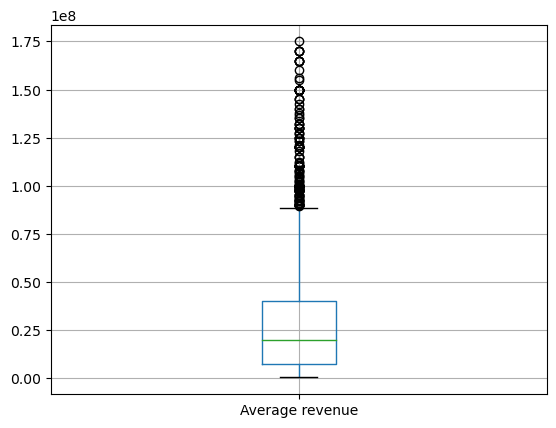

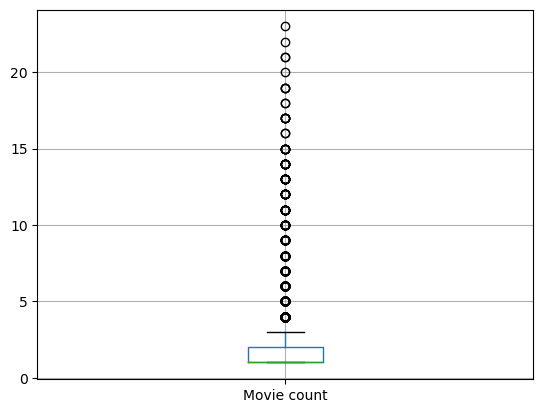

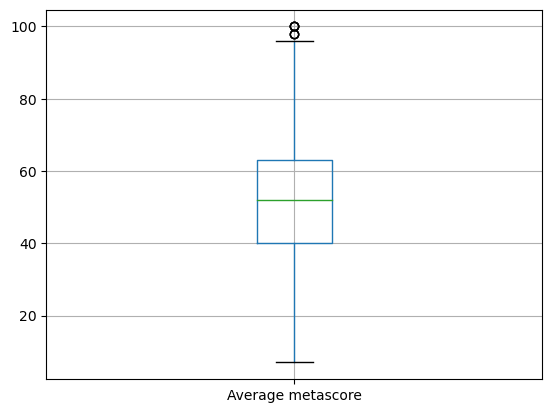

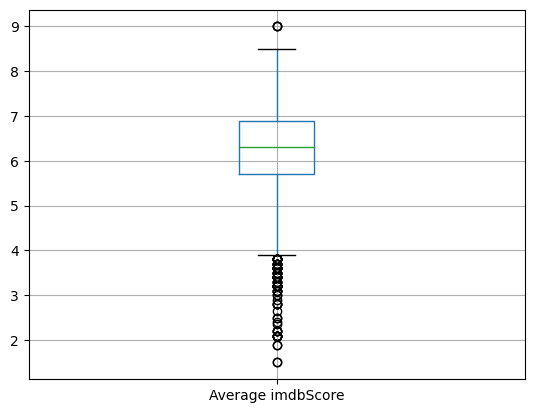

In [33]:
#Plot the behaviour of the metrics
actors_metrics.boxplot(column='Average revenue')
plt.show()
actors_metrics.boxplot(column='Movie count')
plt.show()
actors_metrics.boxplot(column='Average metascore')
plt.show()
actors_metrics.boxplot(column='Average imdbScore')
plt.show()

## Conclusions

In [39]:
#Define the scenario

#High risk generates more revenue with less budget but in case of failure you could lose the whole investment
#Low risk needs more budget but in case of failre you wont lose the whole investment

scenario = 'high risk'

if scenario == 'high risk':
    Genre=genre_percent_rev_desc[genre_percent_rev_desc['mean']== genre_percent_rev_desc['mean'].max()].index[0]
elif scenario == 'low risk':
    Genre = genre_percent_rev_desc[genre_percent_rev_desc['std']== genre_percent_rev_desc['std'].min()].index[0]

Genre

'Horror'

In [40]:
#Define the metrics for the desired actors

#Average revenue: in the highest 25% of all actors
q3_av_revenue = actors_metrics['Average revenue'].quantile(0.75)

#Experience (movie count): in the highest 25% of all actors
q3_movie_count = actors_metrics['Movie count'].quantile(0.75)

#Average metascore (critics score): in the highest 25% of all actors
q3_metascore = actors_metrics['Average metascore'].quantile(0.75)

#Average imdbScore (people score): in the highest 25% of all actors
q3_imdbscore = actors_metrics['Average imdbScore'].quantile(0.75)

print(f'Genre: {Genre}')
print(f'Average Revenue: >={q3_av_revenue}')
print(f'Movie count: >={q3_movie_count}')
print(f'Metascore: >={q3_metascore}')
print(f'imdbScore: >={q3_imdbscore}')

Genre: Horror
Average Revenue: >=40000000.0
Movie count: >=2.0
Metascore: >=63.0
imdbScore: >=6.9


In [41]:
#Get the list of the ideal actors for the genre

#Filter the genre:
actors_search = actors_metrics[actors_metrics['Genres'].apply(lambda series: Genre in series)].sort_values(by='Percentage average revenue', ascending=False)

#Filter the Average revenue:
actors_search = actors_search.loc[actors_search['Average revenue']>=q3_av_revenue]

#Filter the experience:
actors_search = actors_search.loc[actors_search['Movie count']>=q3_movie_count]

#Filter the metascore:
actors_search = actors_search.loc[actors_search['Average metascore']>=q3_metascore]

#Filter the imdbScore:
actors_search = actors_search.loc[actors_search['Average imdbScore']>=q3_imdbscore]

actors_list=actors_search['Actor'].to_list()
actors_search.sort_values(by='Average revenue',ascending=False)



,Actor,Average budget,Average revenue,Percentage average revenue,Average boxOffice,Movie count,Average metascore,Average imdbScore,Genres
252,Daniel Craig,5.837500e+07,5.837500e+07,77.476802,4.642395e+07,8,64.750000,7.062500,"[Adventure, Action, Drama, Horror, Comedy]"
64,James McAvoy,5.144444e+07,5.144444e+07,785.818220,6.617815e+07,9,65.222222,7.022222,"[Action, Adventure, Drama, Horror]"
58,Jessica Chastain,5.002500e+07,5.002500e+07,141.778130,4.767044e+07,10,69.700000,7.050000,"[Adventure, Action, Horror, Drama]"
124,Jeremy Renner,4.387500e+07,4.387500e+07,210.421563,5.900530e+07,8,69.125000,7.025000,"[Action, Drama, Comedy, Horror]"


In [42]:
#Define the average budget for the movies of the searched actors in the specified genre
mask = movies_explode_actors['Actors List'].apply(lambda x: any(item in x for item in actors_search['Actor']))
movies_searched_actors=movies_explode_actors[mask]
prod_budget= movies_searched_actors.loc[movies_searched_actors['genre']==Genre]['production_budget'].mean()
prod_budget
prod_budget_str=locale.currency(prod_budget, grouping=True)

In [43]:
#Define the expected budget for the movie in the specified genre with the searched actors
mask = movies_explode_actors['Actors List'].apply(lambda x: any(item in x for item in actors_search['Actor']))
movies_searched_actors=movies_explode_actors[mask]
percentage_revenue=movies_searched_actors.loc[movies_searched_actors['genre']==Genre]['%_Revenue'].mean()
percentage_revenue_std= movies_searched_actors.loc[movies_searched_actors['genre']==Genre]['%_Revenue'].std()

expected_revenue=percentage_revenue*prod_budget/100
expected_revenue_str=locale.currency(expected_revenue, grouping=True)

print(f'Scenario: {scenario}')
print(f'Genre of the movie: {Genre}')
print(f'List of actors: {actors_list}')
print(f'Prduction budget:{prod_budget_str}')
print(f"Expected percentage revenue: {percentage_revenue:.2f}% +- {percentage_revenue_std:.2f}%")
print(f'Expected total revenue {expected_revenue_str}')

Scenario: high risk
Genre of the movie: Horror
List of actors: ['James McAvoy', 'Jeremy Renner', 'Jessica Chastain', 'Daniel Craig']
Prduction budget:$28,000,000.00
Expected percentage revenue: 1340.43% +- 2334.07%
Expected total revenue $375,319,992.86
